In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, f1_score, recall_score
from tensorflow.keras.layers import Embedding, Conv1D, AveragePooling1D, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import plot_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
import graphviz


sns.set(style = 'white')

In [ ]:
df = pd.read_csv('Call Details-Data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101174 entries, 0 to 101173
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Phone Number    101174 non-null  object 
 1   Account Length  101174 non-null  int64  
 2   VMail Message   101174 non-null  int64  
 3   Day Mins        101174 non-null  float64
 4   Day Calls       101174 non-null  int64  
 5   Day Charge      101174 non-null  float64
 6   Eve Mins        101174 non-null  float64
 7   Eve Calls       101174 non-null  int64  
 8   Eve Charge      101174 non-null  float64
 9   Night Mins      101174 non-null  float64
 10  Night Calls     101174 non-null  int64  
 11  Night Charge    101174 non-null  float64
 12  Intl Mins       101174 non-null  float64
 13  Intl Calls      101174 non-null  int64  
 14  Intl Charge     101174 non-null  float64
 15  CustServ Calls  101174 non-null  int64  
 16  Churn           101174 non-null  bool   
dtypes: bool(1)

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.dtypes

Phone Number       object
Account Length      int64
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls    float64
Churn              object
dtype: object

In [ ]:
df.isnull().sum()

Phone Number      0
Account Length    0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

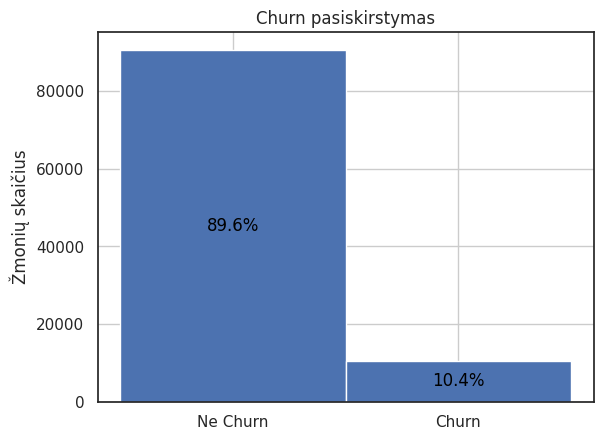

In [ ]:
# Replace True with 1 and False with 0
df['Churn'].replace(to_replace=True, value=1, inplace=True)
df['Churn'].replace(to_replace=False,  value=0, inplace=True)

# Plot the histogram
ax = df['Churn'].hist(bins=2)

# Get the counts for each value
counts = df['Churn'].value_counts()

# Add percentage labels to each bar of the histogram
for i, v in enumerate(counts):
    ax.text(abs(i-0.25), v/2, f'{v/len(df)*100:.1f}%', ha='center', va='center', color='black', fontsize=12)

ax.set_title('Churn pasiskirstymas')
ax.set_ylabel('Žmonių skaičius')
ax.set_xticks([0.25, 0.75])
ax.set_xticklabels(['Ne Churn', 'Churn'])
# Show the plot
plt.savefig('Churn_distribution.pdf')
plt.show()


Correlation between Churn and Account Length: 0.015346276993180405
Correlation between Churn and VMail Message: -0.02501941791799742
Correlation between Churn and Day Mins: 0.022407328235409654
Correlation between Churn and Day Calls: 0.00925822946062959
Correlation between Churn and Day Charge: 0.006959716375060923
Correlation between Churn and Eve Mins: 0.01839962689091973
Correlation between Churn and Eve Calls: 0.009290814868767738
Correlation between Churn and Eve Charge: 0.01978631078776365
Correlation between Churn and Night Mins: 0.01901243926330448
Correlation between Churn and Night Calls: 0.009510909742257826
Correlation between Churn and Night Charge: -0.005661513980175328
Correlation between Churn and Intl Mins: 0.035719832424930306
Correlation between Churn and Intl Calls: -0.009194649162561415
Correlation between Churn and Intl Charge: 0.015211222599596286
Correlation between Churn and CustServ Calls: 0.027743158866412706


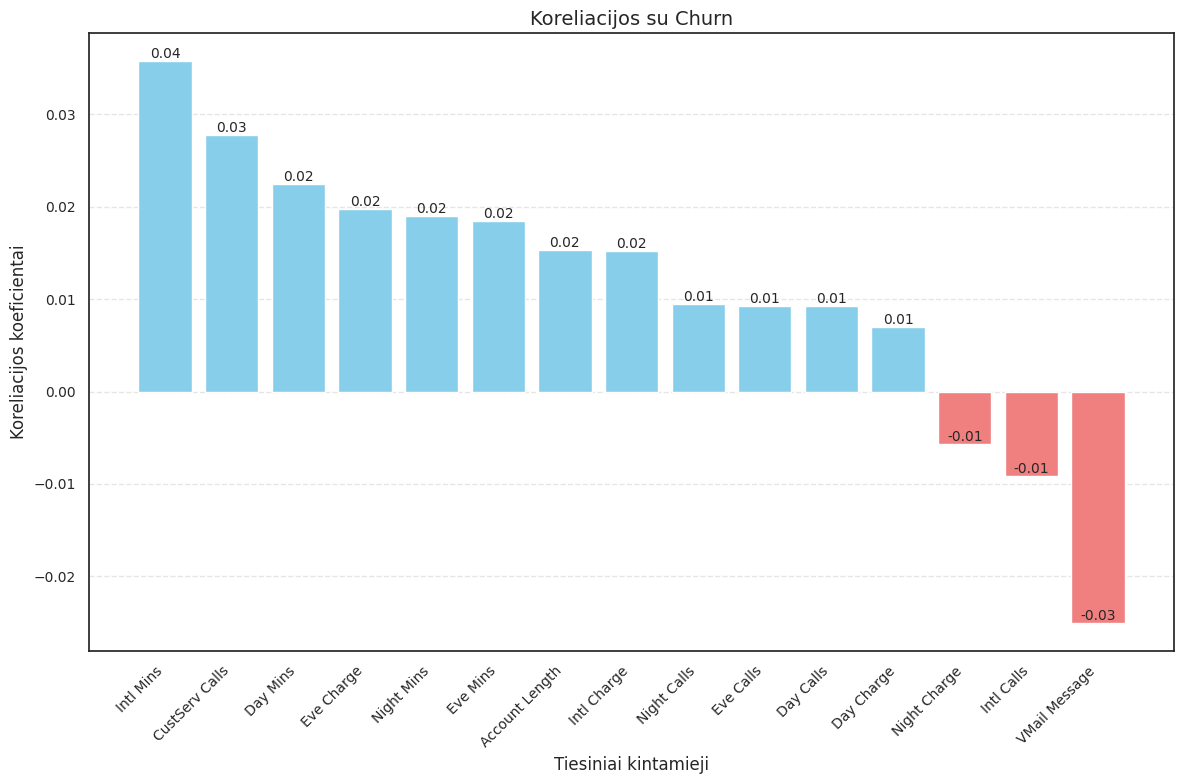

In [ ]:
# Read the data into a DataFrame
df = pd.read_csv('Call Details-Data.csv')  # Replace 'your_data.csv' with the actual file name or path

# Separate the binary and linear variables
binary_data = df['Churn']
linear_data = df.drop('Churn', axis=1).drop('Phone Number', axis = 1)  # Drop the 'Churn' column from the DataFrame

# Calculate the point-biserial correlation coefficient for each linear variable
correlations = {}
for column in linear_data:
    correlation, p_value = stats.pointbiserialr(binary_data, linear_data[column])
    correlations[column] = correlation

# Print the correlation coefficients
for column, correlation in correlations.items():
    print(f"Correlation between Churn and {column}: {correlation}")


# Sort the correlations in descending order
sorted_correlations = {k: v for k, v in sorted(correlations.items(), key=lambda item: item[1], reverse=True)}

# Create a bar chart of the correlation coefficients

plt.figure(figsize=(12, 8))
bar_colors = ['skyblue' if c > 0 else 'lightcoral' for c in sorted_correlations.values()]
plt.bar(sorted_correlations.keys(), sorted_correlations.values(), color=bar_colors)
plt.xlabel('Tiesiniai kintamieji', fontsize=12)
plt.ylabel('Koreliacijos koeficientai', fontsize=12)
plt.title('Koreliacijos su Churn', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add data labels to the bars
for i, (x, y) in enumerate(zip(sorted_correlations.keys(), sorted_correlations.values())):
    plt.text(i, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add horizontal gridlines
plt.tight_layout()
plt.savefig('Koreliacijos.pdf')
plt.show()


<Axes: xlabel='Intl Mins', ylabel='Count'>

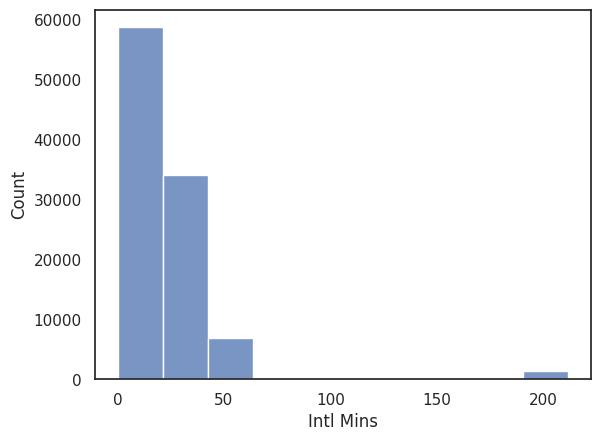

In [ ]:
sns.histplot(df['Intl Mins'], bins=10)   # plot a histogram of a variable to visualize its distribution
#sns.boxplot(y=df['VMail Message'])   # plot a boxplot of a variable to visualize its distribution and outliers

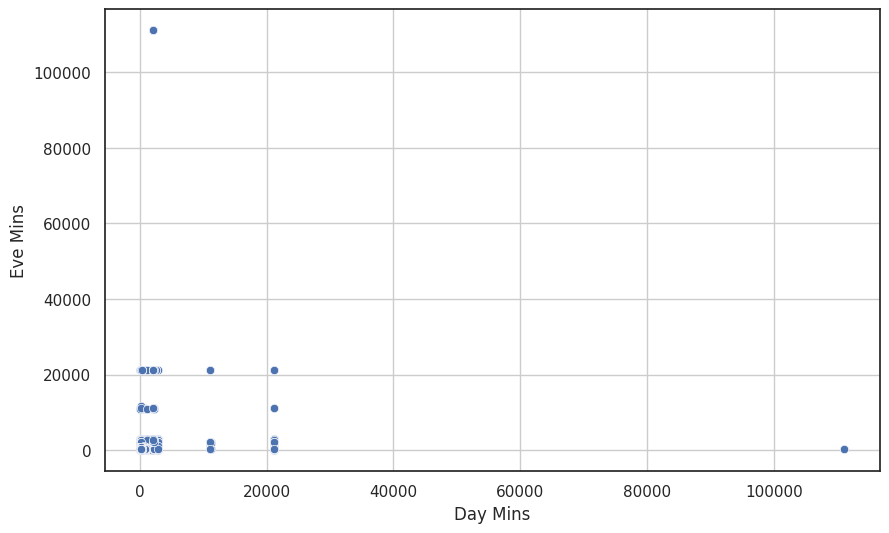

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day Mins', y='Eve Mins', data=df)   # plot a scatterplot to visualize the relationship between two variables
plt.grid(True)  # add a grid to the plot
plt.savefig('Day-eve mins scatter.pdf')
plt.show()

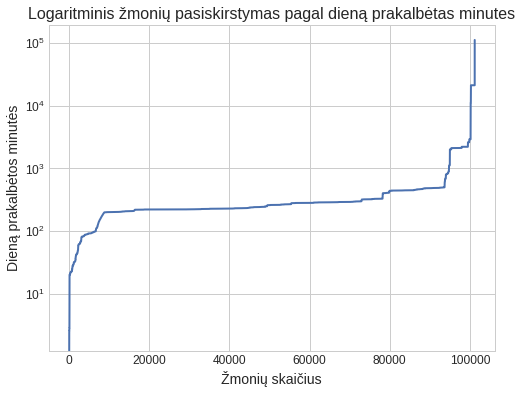

In [ ]:
N = len(df['Day Mins'])
plt.figure(figsize=(8, 6)) # set figure size
plt.style.use('seaborn-whitegrid') # set style
plt.yscale("log")
plt.plot(range(N), df['Day Mins'].sort_values(), linewidth=2) # increase line width

plt.xlabel('Žmonių skaičius', fontsize=14) # increase font size
plt.ylabel('Dieną prakalbėtos minutės', fontsize=14) # increase font size
plt.title('Logaritminis žmonių pasiskirstymas pagal dieną prakalbėtas minutes', fontsize=16) # increase font size
plt.xticks(fontsize=12) # increase x-axis tick font size
plt.yticks(fontsize=12) # increase y-axis tick font size

plt.savefig('Logaritminis žmonių pasiskirstymas pagal dieną prakalbėtas minutes.pdf')
plt.show()

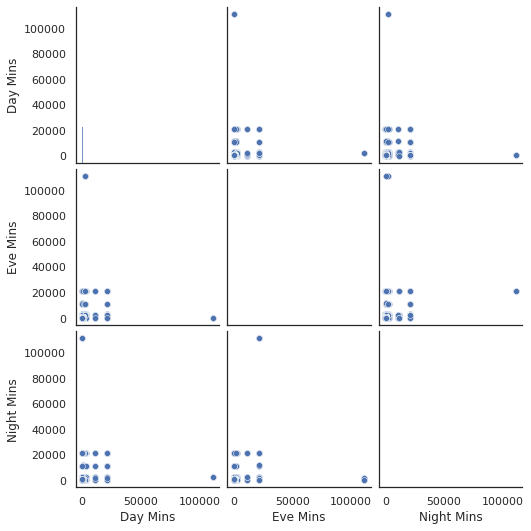

In [ ]:
#ilgai krauna (4min mazdaug)
sns.pairplot(df, vars=['Day Mins', 'Eve Mins', 'Night Mins'])# plot a pairwise scatterplot to visualize the relationships between multiple variables
plt.savefig('Day_Eve_Night Mins scatter.pdf')
plt.show()

<ipython-input-18-497acc3a802c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.drop('Churn', axis=1).corr().round(1)


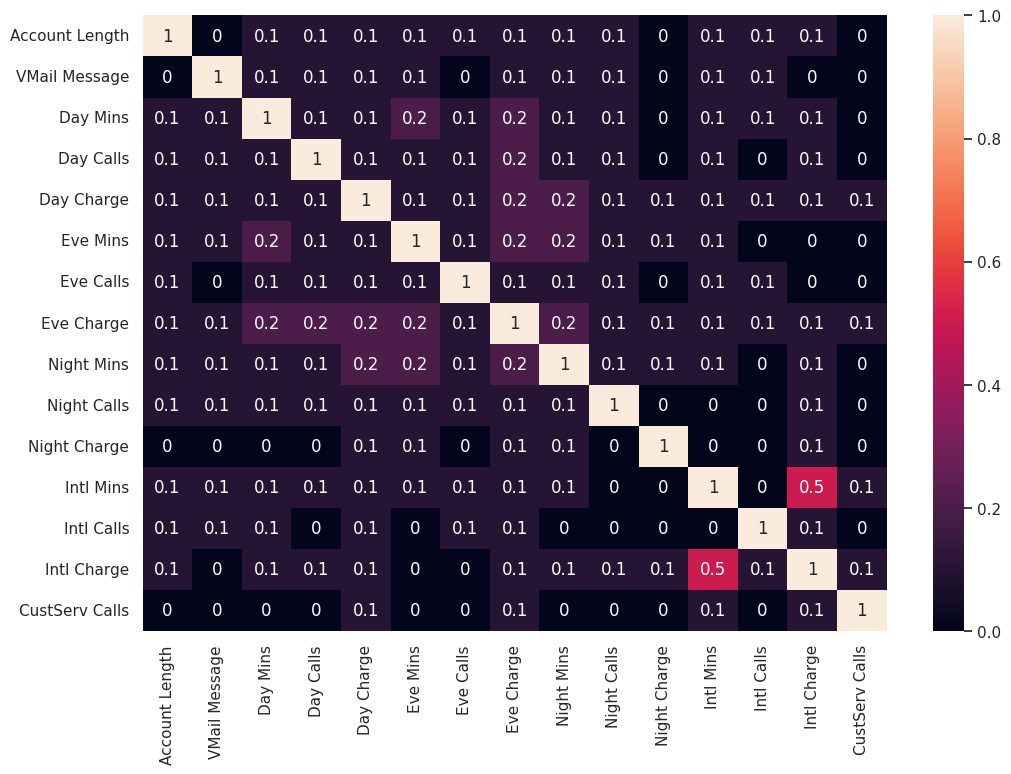

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df.drop('Churn', axis=1).corr().round(1)
sns.heatmap(corr_matrix, annot=True)
plt.savefig('Koreliaciju matrica.pdf')
plt.show()

In [ ]:
from scipy import stats
# Define the columns to analyze for outliers
cols = ['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
        'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
        'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']

# Create boxplots for each column to detect outliers
z = np.abs(stats.zscore(df[cols]))

# Define the threshold for outlier detection
threshold = 1.96

# Create a boolean array indicating whether each data point is an outlier
outliers = (z > threshold).any(axis=1)

# Print the number of outliers and the indices of the outliers
print(f"Number of outliers: {outliers.sum()}")
print(f"Indices of outliers: {np.where(outliers)[0]}")
print("total number of users:",len(df))

Number of outliers: 22189
Indices of outliers: [   542   1502   1912 ... 101157 101168 101170]
total number of users: 101174


In [ ]:
# Calculate the IQR for each column
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outlier detection
threshold = 1.5

# Create a boolean array indicating whether each data point is an outlier
outliers = ((df[cols] < (Q1 - threshold * IQR)) | (df[cols] > (Q3 + threshold * IQR))).any(axis=1)

# Print the number of outliers and the indices of the outliers
print(f"Number of outliers: {outliers.sum()}")
print(f"Indices of outliers: {np.where(outliers)[0]}")

Number of outliers: 60306
Indices of outliers: [     2      3      5 ... 101171 101172 101173]


In [ ]:
z = np.abs(stats.zscore(df[cols]))

# Define the threshold for outlier detection
threshold = 3

# Create a boolean array indicating whether each data point is an outlier
outliers = (z > threshold).any(axis=1)

# Print the number of outliers and the indices of the outliers
print(f"Number of outliers: {outliers.sum()}")
print(f"Indices of outliers: {np.where(outliers)[0]}")

Number of outliers: 9986
Indices of outliers: [  3355   3365   3374 ... 100247 100256 100259]


In [ ]:
z = np.abs(stats.zscore(df[cols]))

# Define the threshold for outlier detection
threshold = 3

# Create a boolean array indicating whether each data point is an outlier
outliers = (z > threshold).any(axis=1)

outliers_df = df[outliers]
print(outliers_df)
outliers_df["Churn"].sum()

In [ ]:
df = df.sample(frac=1, random_state=42)

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:-1])

# Define the number of time steps and features
timesteps = 1
features = scaled_data.shape[1]

# Add the churn column to the preprocessed data
scaled_data = np.concatenate([scaled_data, np.array(df['Churn']).reshape(-1,1)], axis=1)

# Split the data into training and validation sets
train_size = int(len(df) * 0.8)
train_data = scaled_data[:train_size, :]
val_data = scaled_data[train_size:, :]

In [ ]:
# Reshape the data for the LSTM model
trainX, trainY = [], []
for i in range(timesteps, train_data.shape[0]):
    trainX.append(train_data[i-timesteps:i, :-1])
    trainY.append(train_data[i, -1])
trainX, trainY = np.array(trainX), np.array(trainY)

valX, valY = [], []
for i in range(timesteps, val_data.shape[0]):
    valX.append(val_data[i-timesteps:i, :-1])
    valY.append(val_data[i, -1])
valX, valY = np.array(valX), np.array(valY)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(trainX.shape[1], features)))
model.add(LSTM(100))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(valX, valY), verbose=1)

# Evaluate the model
train_pred = model.predict(trainX)
train_pred = np.round(train_pred)
train_acc = accuracy_score(trainY, train_pred)
train_f1 = f1_score(trainY, train_pred)
train_recall = recall_score(trainY, train_pred)

val_pred = model.predict(valX)
val_pred = np.round(val_pred)
val_acc = accuracy_score(valY, val_pred)
val_f1 = f1_score(valY, val_pred)
val_recall = recall_score(valY, val_pred)

print("Training accuracy: {:.2f}%".format(train_acc*100))
print("Training F1-score: {:.2f}%".format(train_f1*100))
print("Training Recall: {:.2f}%".format(train_recall*100))
print("Validation accuracy: {:.2f}%".format(val_acc*100))
print("Validation F1-score: {:.2f}%".format(val_f1*100))
print("Validation Recall: {:.2f}%".format(val_recall*100))

In [ ]:
total_samples = len(trainY)
n_churn_samples = np.sum(trainY)
n_non_churn_samples = total_samples - n_churn_samples
churn_weight = n_non_churn_samples / n_churn_samples
class_weight = {0: 1.0, 1: churn_weight}
print(churn_weight)

8.580729166666666


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(trainX.shape[1], features)))
model.add(LSTM(100))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(valX, valY), verbose=1, class_weight=class_weight)

# Evaluate the model
train_pred = model.predict(trainX)
train_pred = np.round(train_pred)
train_acc = accuracy_score(trainY, train_pred)
train_f1 = f1_score(trainY, train_pred)
train_recall = recall_score(trainY, train_pred)

val_pred = model.predict(valX)
val_pred = np.round(val_pred)
val_acc = accuracy_score(valY, val_pred)
val_f1 = f1_score(valY, val_pred)
val_recall = recall_score(valY, val_pred)

print("Training accuracy: {:.2f}%".format(train_acc*100))
print("Training F1-score: {:.2f}%".format(train_f1*100))
print("Training Recall: {:.2f}%".format(train_recall*100))
print("Validation accuracy: {:.2f}%".format(val_acc*100))
print("Validation F1-score: {:.2f}%".format(val_f1*100))
print("Validation Recall: {:.2f}%".format(val_recall*100))


Epoch 1/10
1265/1265 [==============================] - 28s 17ms/step - loss: 0.4559 - accuracy: 0.5542 - val_loss: 0.2573 - val_accuracy: 0.2120
Epoch 2/10
1265/1265 [==============================] - 21s 16ms/step - loss: 0.4495 - accuracy: 0.5229 - val_loss: 0.2133 - val_accuracy: 0.8962
Epoch 3/10
1265/1265 [==============================] - 19s 15ms/step - loss: 0.4493 - accuracy: 0.5314 - val_loss: 0.2532 - val_accuracy: 0.2960
Epoch 4/10
1265/1265 [==============================] - 21s 16ms/step - loss: 0.4489 - accuracy: 0.5035 - val_loss: 0.2311 - val_accuracy: 0.8964
Epoch 5/10
1265/1265 [==============================] - 19s 15ms/step - loss: 0.4488 - accuracy: 0.5219 - val_loss: 0.2253 - val_accuracy: 0.8964
Epoch 6/10
1265/1265 [==============================] - 22s 18ms/step - loss: 0.4485 - accuracy: 0.5360 - val_loss: 0.2741 - val_accuracy: 0.1035
Epoch 7/10
1265/1265 [==============================] - 20s 16ms/step - loss: 0.4487 - accuracy: 0.5098 - val_loss: 0.2394 -

In [ ]:
# Load dataset
df = pd.read_csv('Call Details-Data.csv')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Churn', axis=1).drop('Phone Number', axis = 1), df['Churn'], test_size=0.2, random_state=42)

# Apply oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: ignored

In [ ]:
# Load dataset
df = pd.read_csv('Call Details-Data.csv')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Churn', axis=1).drop('Phone Number', axis = 1), df['Churn'], test_size=0.2, random_state=42)

# Apply oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9826941647123741
Test accuracy: 0.9579935754880158
Test F1 score: 0.8106904231625836
Test recall: 0.8737397983677389


In [ ]:
# Get feature importances
importances = grid_search.best_estimator_.feature_importances_

# Create a dataframe to store feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values('importance', ascending=True)

# Print feature importances
print(feature_importances)

           feature  importance
14  CustServ Calls    0.032160
12      Intl Calls    0.034339
1    VMail Message    0.036369
6        Eve Calls    0.062294
3        Day Calls    0.063477
9      Night Calls    0.063875
0   Account Length    0.064880
13     Intl Charge    0.065305
11       Intl Mins    0.067783
8       Night Mins    0.074417
5         Eve Mins    0.075431
10    Night Charge    0.077496
7       Eve Charge    0.078331
4       Day Charge    0.099031
2         Day Mins    0.104813


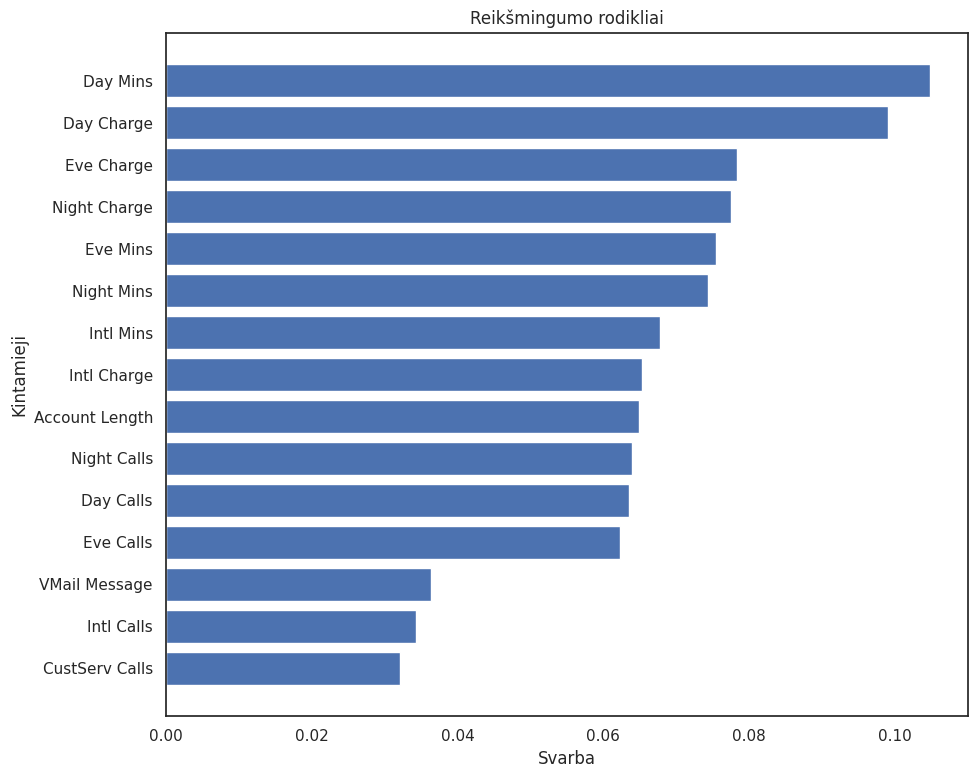

In [ ]:
plt.figure(figsize=(10, 8))  # Set the desired figure size
plt.barh(feature_importances.feature, feature_importances.importance)
plt.xlabel('Svarba')
plt.ylabel('Kintamieji')
plt.title('Reikšmingumo rodikliai')
plt.tight_layout()  # Adjust the spacing between subplots and labels
plt.savefig('Svarbiausi_kriterijai.pdf')

In [ ]:
# Load dataset
df = pd.read_csv('Call Details-Data.csv')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Churn', axis=1).drop('Phone Number', axis = 1), df['Churn'], test_size=0.2, random_state=42)

# Apply oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9826458821906469
Test accuracy: 0.9581418334568816
Test F1 score: 0.8114005789356491
Test recall: 0.8746999519923188


In [ ]:
# Load dataset
df = pd.read_csv('Call Details-Data.csv')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Churn', axis=1).drop('Phone Number', axis = 1), df['Churn'], test_size=0.2, random_state=42)

# Apply oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [1000],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Best score: 0.9826389846875431
Test accuracy: 0.9582406721027922
Test F1 score: 0.8118459140503228
Test recall: 0.8751800288046088


In [ ]:
# Load dataset
df = pd.read_csv('Call Details-Data.csv')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Churn', axis=1).drop('Phone Number', axis = 1), df['Churn'], test_size=0.2, random_state=42)

# Initialize and fit decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluate model on test set
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate number of leaf nodes
leaf_nodes = sum([1 for val in dt.tree_.value if val.any()])

print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)
print('Number of leaf nodes:', leaf_nodes)

# Export decision tree to DOT format
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['No Churn', 'Churn'],
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize decision tree with Graphviz
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render('decision_tree')

Test accuracy: 0.9672349888806523
Test F1 score: 0.841425496292753
Test recall: 0.8444551128180509


In [ ]:
# Load dataset
df = pd.read_csv('Call Details-Data.csv')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Churn', axis=1).drop('Phone Number', axis = 1), df['Churn'], test_size=0.2, random_state=42)

# Initialize and fit decision tree classifier with max depth of 10
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

# Evaluate model on test set
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

leaf_nodes = sum([1 for val in dt.tree_.value if val.any()])

print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)
print('Number of leaf nodes:', leaf_nodes)

In [ ]:
plt.title('Modelio tikslumas')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Tikslumas')
plt.xlabel('epochų skaičius')
plt.legend(['mokymo','validavimo'])
plt.savefig('LSTM_weighted_tikslumas.pdf')
plt.show()
#----------------------------------------
plt.plot(history.history['loss'])

plt.title('Modelio paklaidos funkcija')
plt.plot(history.history['val_loss'])
plt.xlabel('epochų skaičius')
plt.ylabel('Paklaida')
plt.legend(['mokymo','validavimo'])
plt.savefig('LSTM_weighted_loss.pdf')
plt.show()

In [ ]:
# Load dataset
df = pd.read_csv('Call Details-Data.csv')
df['Mins'] = df['Day Mins'] + df['Eve Mins'] + df['Night Mins']
df['Calls'] = df['Day Calls'] + df['Eve Calls'] + df['Night Calls']
df['Charge'] = df['Day Charge'] + df['Eve Charge'] + df['Night Charge']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Churn', axis=1).drop('Phone Number', axis = 1), df['Churn'], test_size=0.2, random_state=42)

# Apply oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)

In [ ]:
# Get feature importances
importances = grid_search.best_estimator_.feature_importances_

# Create a dataframe to store feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values('importance', ascending=True)

# Print feature importances
print(feature_importances)

plt.figure(figsize=(10, 8))  # Set the desired figure size
plt.barh(feature_importances.feature, feature_importances.importance)
plt.xlabel('Svarba')
plt.ylabel('Kintamieji')
plt.title('Reikšmingumo rodikliai')
plt.tight_layout()  # Adjust the spacing between subplots and labels
plt.savefig('Svarbiausi_kriterijai + aggreguoti.pdf')

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Churn', axis=1).drop('Phone Number', axis = 1).drop('Day Mins', axis = 1).drop('Eve Mins', axis = 1).drop('Night Mins', axis = 1)
    .drop('Day Calls', axis = 1).drop('Eve Calls', axis = 1).drop('Night Calls', axis = 1)
    .drop('Day Charge', axis = 1).drop('Eve Charge', axis = 1).drop('Night Charge', axis = 1), df['Churn'], test_size=0.2, random_state=42)

# Apply oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)

In [ ]:
# Load dataset
df = pd.read_csv('Call Details-Data.csv')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Churn', 'Phone Number'], axis=1), df['Churn'], test_size=0.2, random_state=42)

# Apply over-sampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define the desired train_sizes as relative sizes
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 1.0]

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(
    grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', train_sizes=train_sizes, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Mokymosi kreivė')
plt.xlabel('Apmokymo dydis')
plt.ylabel('Tikslumas')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Apmokymo Tikslumas')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Kryžminės-Validacijos Tikslumas')

plt.legend(loc='lower right')
plt.savefig('Learning curve.pdf')
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: ignored

In [ ]:

# Load dataset
df = pd.read_csv('Call Details-Data.csv')
df['Mins'] = df['Day Mins'] + df['Eve Mins'] + df['Night Mins']
df['Calls'] = df['Day Calls'] + df['Eve Calls'] + df['Night Calls']
df['Charge'] = df['Day Charge'] + df['Eve Charge'] + df['Night Charge']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Churn', axis=1).drop('Phone Number', axis=1).drop('Day Mins', axis=1).drop('Eve Mins', axis=1).drop(
        'Night Mins', axis=1)
    .drop('Day Calls', axis=1).drop('Eve Calls', axis=1).drop('Night Calls', axis=1)
    .drop('Day Charge', axis=1).drop('Eve Charge', axis=1).drop('Night Charge', axis=1), df['Churn'], test_size=0.2,
    random_state=42)

# Apply oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)



# Get feature importances
importances = grid_search.best_estimator_.feature_importances_

# Create a dataframe to store feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values('importance', ascending=True)

# Print feature importances
print(feature_importances)

plt.figure(figsize=(10, 8))  # Set the desired figure size
plt.barh(feature_importances.feature, feature_importances.importance)
plt.xlabel('Svarba')
plt.ylabel('Kintamieji')
plt.title('Reikšmingumo rodikliai')
plt.tight_layout()  # Adjust the spacing between subplots and labels
#plt.savefig('Svarbiausi_kriterijai - tik agreguoti.pdf')

In [ ]:
# Load dataset
df = pd.read_csv('Call Details-Data.csv')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Churn', 'Phone Number'], axis=1), df['Churn'], test_size=0.2, random_state=42)

# Apply over-sampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Perform PCA
n_components = 10  # Set the desired number of PCA components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train_pca, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)

# Get PCA component composition
component_composition = pca.components_

# Get original feature names
original_feature_names = df.drop(['Churn', 'Phone Number'], axis=1).columns

# Create a DataFrame for component composition
component_composition_df = pd.DataFrame(component_composition.T, columns=['PC{}'.format(i+1) for i in range(n_components)], index=original_feature_names)

# Print PCA component composition
print('PCA Component Composition:')
print(component_composition_df)


In [ ]:
# Load dataset
df = pd.read_csv('Call Details-Data.csv')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Churn', 'Phone Number'], axis=1), df['Churn'], test_size=0.2, random_state=42)

# Apply over-sampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Perform PCA
n_components = 5  # Set the desired number of PCA components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train_pca, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)

# Get feature importances
importances = grid_search.best_estimator_.feature_importances_

# Get original feature names based on selected PCA components
original_feature_names = ['PC{}'.format(i+1) for i in range(n_components)]

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': original_feature_names, 'Importance': importances})

# Sort by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Get PCA component composition
component_composition = pca.components_

# Get original feature names
original_feature_names = df.drop(['Churn', 'Phone Number'], axis=1).columns

# Create a DataFrame for component composition
component_composition_df = pd.DataFrame(component_composition.T, columns=['PC{}'.format(i+1) for i in range(n_components)], index=original_feature_names)

# Print feature importance
print('Feature Importance:')
print(feature_importance_df)

plt.figure(figsize=(10, 4))  # Set the desired figure size
plt.barh(feature_importance_df.iloc[:, 0], feature_importance_df.iloc[:, 1])
plt.xlabel('Svarba')
plt.ylabel('Kintamieji')
plt.title('Reikšmingumo rodikliai')
plt.tight_layout()  # Adjust the spacing between subplots and labels
plt.savefig('PCA5_Svarbiausi_kriterijai.pdf')

# Print PCA component composition
print('PCA Component Composition:')
print(component_composition_df)


In [ ]:
# Load dataset
df = pd.read_csv('Call Details-Data.csv')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Churn', 'Phone Number'], axis=1), df['Churn'], test_size=0.2, random_state=42)

# Apply over-sampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Perform PCA
n_components = 15  # Set the desired number of PCA components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train_pca, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)

# Get feature importances
importances = grid_search.best_estimator_.feature_importances_

# Get original feature names based on selected PCA components
original_feature_names = ['PC{}'.format(i+1) for i in range(n_components)]

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': original_feature_names, 'Importance': importances})

# Sort by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Get PCA component composition
component_composition = pca.components_

# Get original feature names
original_feature_names = df.drop(['Churn', 'Phone Number'], axis=1).columns

# Create a DataFrame for component composition
component_composition_df = pd.DataFrame(component_composition.T, columns=['PC{}'.format(i+1) for i in range(n_components)], index=original_feature_names)

# Print feature importance
print('Feature Importance:')
print(feature_importance_df)

plt.figure(figsize=(10, 8))  # Set the desired figure size
plt.barh(feature_importance_df.iloc[:, 0], feature_importance_df.iloc[:, 1])
plt.xlabel('Svarba')
plt.ylabel('Kintamieji')
plt.title('Reikšmingumo rodikliai')
plt.tight_layout()  # Adjust the spacing between subplots and labels
plt.savefig('PCA15_Svarbiausi_kriterijai.pdf')


# Print PCA component composition
print('PCA Component Composition:')
print(component_composition_df)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9826941647123741
Test accuracy: 0.9579935754880158
Test F1 score: 0.8106904231625836
Test recall: 0.8737397983677389


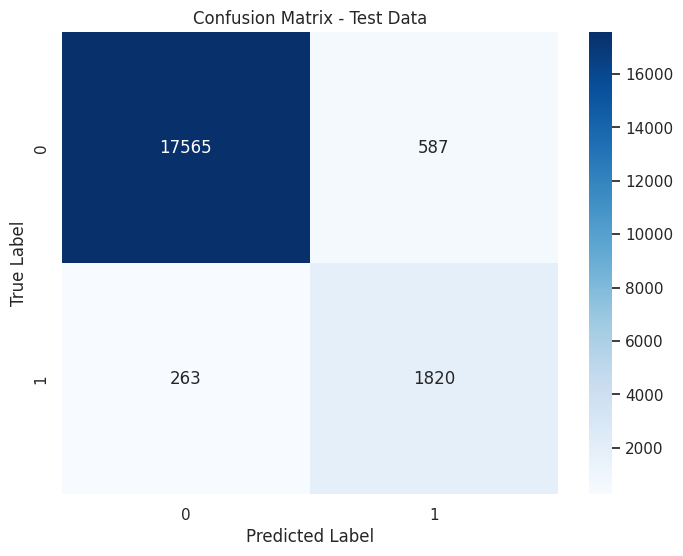

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Call Details-Data.csv')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Churn', axis=1).drop('Phone Number', axis=1), df['Churn'], test_size=0.2, random_state=42)

# Apply oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize and fit GridSearchCV with RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Test accuracy:', acc)
print('Test F1 score:', f1)
print('Test recall:', recall)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save confusion matrix as PDF
plt.savefig('confusion_matrix.pdf', format='pdf')

# Show the plot
plt.show()


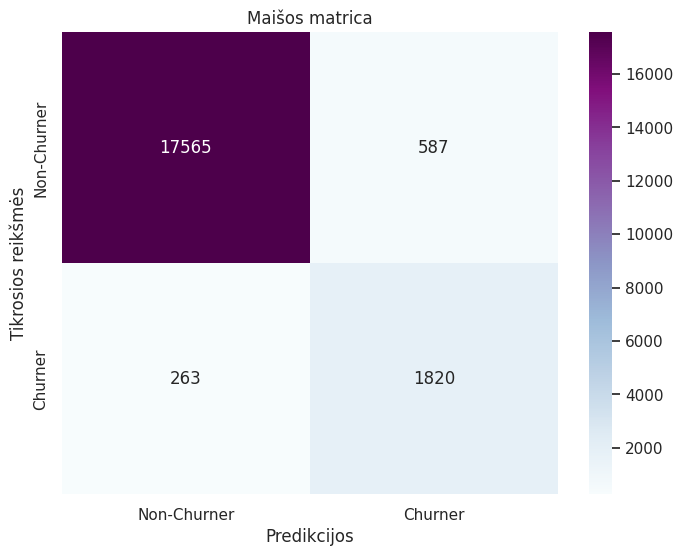

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with modified labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu',
            xticklabels=['Non-Churner', 'Churner'],
            yticklabels=['Non-Churner', 'Churner'])
plt.title('Maišos matrica')
plt.xlabel('Predikcijos')
plt.ylabel('Tikrosios reikšmės')

# Save confusion matrix as PDF
plt.savefig('confusion_matrix.pdf', format='pdf')

# Show the plot
plt.show()